In [2]:
import plotting

In [3]:
import numpy as np

In [47]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib2tikz import save as tikz_save

%matplotlib inline

## Amdahl's law

In [21]:
def get_speedup(n_procs, alpha):
    return [1/(alpha + (1-alpha)/p) for p in n_procs]

In [46]:
procs = [1,4,16,64,256,1024]
small_ = get_speedup(procs, 0)
large_ = get_speedup(procs, 0.0191)

In [48]:
n_nodes = procs
lines = [small_, large_]

In [67]:
legend_title = 'Number of pixels'
labels = ['8,294,400', '368,640,000']
xlabel = 'processors'
ylabel = 'speedup'

filename = 'expected-speedup.svg'

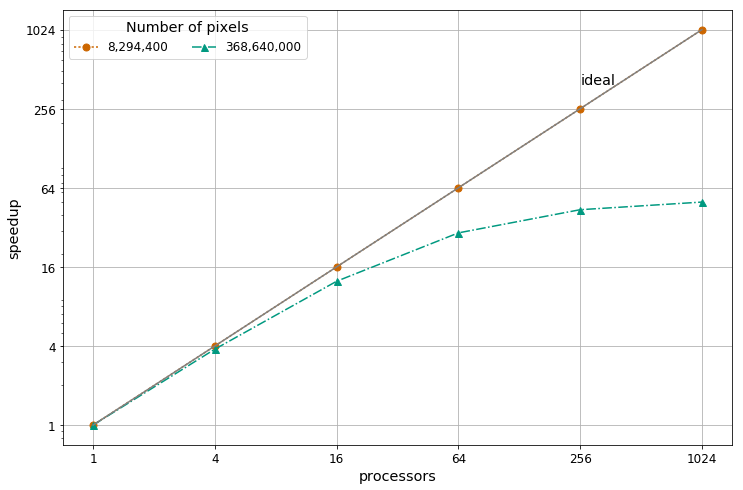

In [69]:
plt.figure(figsize=(12,8))
plt.grid()

# colormap
n_lines = len(lines)
line_colors = [plotting.colorblind_palette_dict[plotting.palette_order[i%plotting.n_colors]] 
               for i in range(n_lines)]

# plot lines
for i,tts in enumerate(lines):
    plt.plot(n_nodes, tts, 
             color=line_colors[i], linestyle=plotting.linestyles[i%plotting.n_linestyles], 
             marker=plotting.markers[i%plotting.n_markers], 
             markerfacecolor=line_colors[i], 
             markersize=7)

plt.plot(n_nodes, n_nodes, color=plotting.ideal_color)
plt.text(n_nodes[-2]+1, n_nodes[-2]+140, 'ideal', fontsize='x-large')

# x-axis
plt.xscale('log', basex=2)
plt.xticks(n_nodes, fontsize='large')
plt.xlabel(xlabel, fontsize='x-large')

# y-axis
plt.yscale('log', basex=2)
plt.yticks(n_nodes, fontsize='large')
plt.ylabel(ylabel, fontsize='x-large')

# legend
legend = plt.legend(labels, loc='upper left',
                    ncol=min(n_lines,4), shadow=False, fancybox=True,
                    title=legend_title, fontsize='large')
plt.setp(legend.get_title(), fontsize='x-large')

# ticks formatting
ax = plt.gca()
# ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
#ax.yaxis.set_major_formatter(ScalarFormatter())

# tikz_save(filename, figureheight='\\figureheight', figurewidth='\\figurewidth')
plt.savefig(filename)

plt.show()